In [1]:
# this notebook  is for logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [2]:
file ='./general_data.csv'
data = pd.read_csv(file)
print(data.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [3]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data.shape

(4410, 24)

In [5]:
#data Cleaning
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [7]:
data.fillna(0,inplace =True)

In [8]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [9]:
print(len(data))
print(len(data[data['Attrition']=='Yes']))
print(len(data[data['Attrition']=='No']))

4410
711
3699


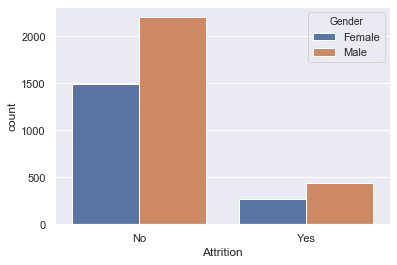

In [10]:
sns.countplot(x = "Attrition",data=data, hue="Gender")
plt.show()

In [11]:
print(data['BusinessTravel'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['Department'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())
print(data['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [17]:
from sklearn.preprocessing import LabelEncoder
label_X = LabelEncoder()
data['BusinessTravel'] = label_X.fit_transform(data['BusinessTravel'])
data['Department'] = label_X.fit_transform(data['Department'])
data['EducationField'] = label_X.fit_transform(data['EducationField'])
data['Gender'] = label_X.fit_transform(data['Gender'])
data['JobRole'] = label_X.fit_transform(data['JobRole'])
data['MaritalStatus'] = label_X.fit_transform(data['MaritalStatus'])
data['Over18'] = label_X.fit_transform(data['Over18'])

In [18]:
from sklearn.preprocessing import LabelEncoder
label_y=LabelEncoder()
data['Attrition']=label_y.fit_transform(data['Attrition'])

In [19]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [20]:
from sklearn.model_selection import train_test_split

In [33]:
target = ['Attrition']
data[target]

,Attrition
0,0
1,1
2,0
3,0
4,0
...,...
4405,0
4406,0
4407,0
4408,0


In [27]:
Y = data[['Attrition']]
Y.head()
X = data.drop('Attrition', axis = 1)
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,1,1,0,1,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,10,1,1,1,2,0,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,3,1,4,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,4,1,3,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,5,1,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [34]:
Y.shape

(4410, 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3528, 23), (882, 23), (3528, 1), (882, 1))

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
predict_values = lr.predict(X_test)



c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
print(accuracy_score(y_test,predict_values))
print(confusion_matrix(y_test,predict_values))

0.8401360544217688
[[741   0]
 [141   0]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.00      0.00      0.00       141

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882



c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
ohit S. Sardesai
Local Guide · 27 reviews · 22 photos
a month ago
The reasons I'm giving a 3 star rating are:
1. Good and fast service 
2. Polite, educated & well-informed staff …More
1
Manpreet Arora
Manpreet Arora
Local Guide · 16 reviews · 44 photos
6 days ago
Food is awesome. Ambience is also very good. Only thing is sometimes you have to wait outside for table because of more crowd. It's the best place to hangout with your group of friends. I didn't find this place as expensive. You will find the best variety of burgers wraps and shakes. 👌👌👌
Like
Abhishek L
Abhishek L
Local Guide · 98 reviews · 356 photos
2 months ago
The restaurant's taste can never be compromised. It was that good. The ambience was very nice and pleasant although this place has crowd most of the time. …More
Like
theijeshwar s
theijeshwar s
Local Guide · 25 reviews · 28 photos
a month ago
It's a good place to dine out with friends and family.. I went with my family we were 7 everybody enjoyed the food apart from me. I didn't like any of it,, it was not my kind of food. 5 star for ambience // 4.5 star for hospitality and service // 4.5 star for quality of food // 4.5 star for quantity of food. Value for money
Like
Chetan Vinchhi
Chetan Vinchhi
19 reviews
2 months ago
Nice clean place for a quick bite. Courteous staff. Adequate menu choices - both vegetarian and non-vegetarian - for a group and repeat visits. Food quality is quite good although the cheesecake could have been better. Easy on the pocket.
Like
fico mano
fico mano
Local Guide · 68 reviews · 717 photos
4 weeks ago
It's a nice, decent place to dine. Young crowd. Valet parking is there. Since it is little small place, you may have to wait on a busy day. They goofed up on the menu little bit as the long table was shared with other people, but not on the bill so no issues there 😀 On the whole it's a good place to have tasty food.
Like
Bhaskar Ganguli
Bhaskar Ganguli
Local Guide · 44 reviews · 335 photos
2 months ago
This is one of the most divine places for any foodie. From burgers to pasta, every dish is just worthy of the price. You can just have a happy meal here. …More
Like
Gauri Mehta
Gauri Mehta
Local Guide · 22 reviews · 297 photos
a day ago
During a recent visit to Bangalore wanted to eat at Truffles as had read such great reviews. Reached around lunch time on Sunday...and there was a crowd outside. Had to wait about 20mins. …More
Like
Amit Chhajer
Amit Chhajer
Local Guide · 253 reviews · 3,427 photos
a month ago
Good food. No alcohol served. Some amazing burgers in town. Hard to find a table to sit on any day for any meal. They have great desserts too. Staff wasn't very helpful and seemed arrogant at times. …More
Like
Sounava Ghosh
Sounava Ghosh
Local Guide · 138 reviews · 695 photos
a week ago
Coming to Truffles since 10yrs now. First time in this particular branch. The main course was as usual awesome (chicken steak). Good service too. Did not like the cheesecake. It was so frozen, that it had become really hard.
Like
Yudhishtir j
Yudhishtir j
Local Guide · 133 reviews · 71 photos
4 weeks ago
Love the place, except for the fact that the place is always packed but I wouldn't mind waiting for a while beacuse the food here more than makes up for it. Stuffed fungi is my pick for anyone and then get a steak or any of those juicy …More
Like
Simrun Chopra
Simrun Chopra
Local Guide · 77 reviews · 28 photos
2 weeks ago
Great value for money. One of the rare places where you can  opt for completely indulgent to a healthy meal. 
Large menu that covers all palates. I would rank this as one of the few restaurants that people of every age can enjoy.
Like
Bharath RK
Bharath RK
1 review
18 hours ago
Ambience and service was wonderful. The crowd was a temporary issue. Otherwise the place is amazing. Food is worth the price you pay.
Like
vishak kamath
vishak kamath
Local Guide · 44 reviews · 27 photos
a month ago
They make good Subs and Burgers. Crowded mostly on weekends. A good place with friendly staffs. Chicken lovers have some great options to choose from the menu. Chicken Peri peri burger, Tandoori chicken burger and devil's chicken sub are worth a try.
Like
Saptarshi Choudhury
Saptarshi Choudhury
Local Guide · 34 reviews · 2 photos
a month ago
Food is very good, especially the continental dishes. The atmosphere and ambience gives a cozy diner vibe. Service is good. Have visited several times and never been disappointed.
Like
Pratham
Pratham
Local Guide · 36 reviews · 12 photos
a day ago
I would like to appreciate the management here. Coz i happened to go with a friend of mine on a very busy night. 
And the way we were accommodated by the staff and the quick service inspire of …More
Like
YASHWANTH N
YASHWANTH N
8 reviews
2 months ago
Amazingly delicious but surprisingly crowded. This is my maiden visit to store as I used to order food from this outlet in online. I felt bit tough with the parking facility but got a relaxation to park my bike in the Parking slot though …More
Like
Likhit K
Likhit K
Local Guide · 142 reviews · 471 photos
17 hours ago
Truffles is expensive but the stuff is good. Chicken nuggets were amazing. Also the red velvet cake was great. The frie were not so great, it was bland and couldn't even taste the potato. Ambience is good but it doesn't feel very cozy and feels crowded
Like
Deepak C
Deepak C
Local Guide · 16 reviews · 6 photos
2 weeks ago
Good ambience. Delicious with good quality food which is worth for money,, not over rated. Might be crowded during weekends.
Like
AJITH PAUL
AJITH PAUL
Local Guide · 60 reviews · 9 photos
2 months ago
Good place for a hangout.... Price is high but good and fresh food.. Mainly Italian cuisine... Worth going.. Parking is in Opp road
Like
Prasoon Gokhe
Prasoon Gokhe
Local Guide · 105 reviews · 568 photos
3 months ago
The best, biggest, tastiest, fulfilling burgers can be found here! If you are looking for a plane for burgers in Bangalore, then this is a place for you. Order anything! You'll not leave disappointed. It's tough to find a table at weekends so it's always better to go there in weekdays!
Like
Sunandita Sahu
Sunandita Sahu
Local Guide · 92 reviews · 453 photos
2 weeks ago
One of the best burgers in town! Drinks could be better. Will appreciate if they gave a choice of French fries instead of chips on the side.
Like
Ashok Singh
Ashok Singh
Local Guide · 9 reviews · 69 photos
2 months ago
I say it's the best place for Burger. Good place for a birthday treat. Place is big. Less waiting time. Great Good with taste. If you love cheese, visit atleast once in a month.
Like
Alex Gregory
Alex Gregory
Local Guide · 108 reviews · 220 photos
a day ago
The service is really quick. Burgers are well made. Filling is top class. XL burgers only for heavy eaters.
Like
Jyoti Tyagi
Jyoti Tyagi
Local Guide · 5 reviews · 28 photos
2 days ago
Truffles have been one of my go to places in Bangalore. This time ordered arabiata pasta, veg burger, cappuccino royale and french toast. Got cappuccino and pasta first and hence the pics below. They were good. Burger was fine too but we didn’t like the french toast. It was soft unlike a toast.
Like
Chakri Reddy
Chakri Reddy
Local Guide · 74 reviews · 165 photos
a month ago
Nice place. Quick service and good tasty drinks. You would love burgers at this place. Must visit if you are near Indiranagar. Good place for lunch and dinner
Like
Vidya Prabhu
Vidya Prabhu
Local Guide · 19 reviews · 91 photos
a month ago
Truffles has always been my favorite go-to place! Be it family or friends, it's a perfect place to hangout with everybody. Friendly staff, good ambience, great food, brilliant taste, light on pockets, so overall it's an excellent place. If …More
Like
shreyas kothari
shreyas kothari
Local Guide · 28 reviews · 53 photos
3 weeks ago
Nice place. Food is good. One good thing is that now they have a parking area opposite to the restaurant and its quite big.
Like
Punit Gala
Punit Gala
Local Guide · 52 reviews · 195 photos
4 months ago
The place was really good, with nice ambiance and food. They order came quickly and tasted delicious. The burger was heavy and tasty and the fries and shake is a must order food. The rate of the food for the quantity giving is worth every penny I feel. Nice place for friends go have there meal and chill
2
Muralidhar Reddy
Muralidhar Reddy
Local Guide · 159 reviews · 64 photos
2 weeks ago-
This place has varities of Cakes and snack food, which is yummy. Ambience and service are really good and prices are affordable. …More
Like